In [1]:
import znflow
import random

In [2]:
class ComputeSum(znflow.Node):
    inputs: list = znflow.EdgeAttribute()
    outputs: float = znflow.EdgeAttribute(None)
    
    def run(self):
        self.outputs = sum(self.inputs)

In [3]:
@znflow.nodify
def random_number(seed):
    random.seed(seed)
    print(f"Get random number with {seed = }")
    return random.random()

## Without building a graph

In [4]:
n1 = random_number(5)
n2 = random_number(10)

compute_sum = ComputeSum(inputs=[n1, n2])
compute_sum.run()
n3 = random_number(compute_sum.outputs)
print(n3)

Get random number with seed = 5
Get random number with seed = 10
Get random number with seed = 1.1943042895796154
0.2903973544626711


## Using a graph

In [5]:
with znflow.DiGraph() as graph:
    n1 = random_number(5)
    n2 = random_number(10)

    compute_sum = ComputeSum(inputs=[n1, n2])
    
    n3 = random_number(compute_sum.outputs)

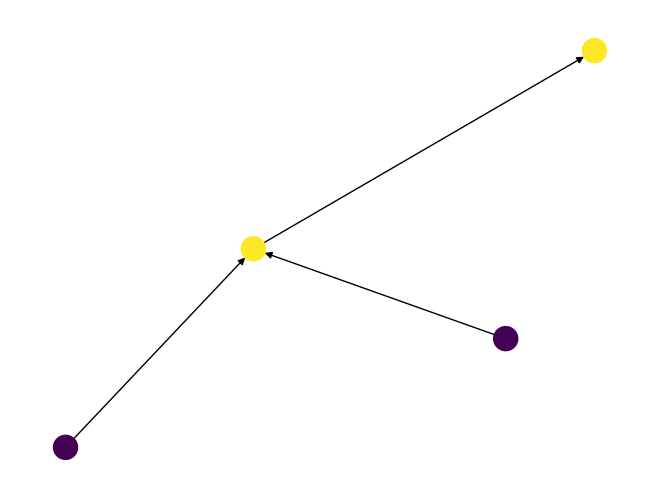

In [6]:
znflow.draw(graph)

In [7]:
graph.run()

Get random number with seed = 5
Get random number with seed = 10
Get random number with seed = 1.1943042895796154


In [8]:
n3.get_result()

0.2903973544626711